<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/Baby_Q_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is Baby_Q modified and specialized for the grid world enviroment of AIMA, Chapter 17.1

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [ ]:
# Define the grid world dimensions and rewards
grid_size = [3, 4]
terminal_states = {'goal': [[0, 3]], 'trap': [[1, 3]]}  # Goal and trap states
obstacle_states = [[1,1]]  # Obstacle states

# rewards = np.zeros(grid_size)
rewards = np.full(grid_size, -0.5)



# Assign rewards
for row in range(grid_size[0]):
    for col in range(grid_size[1]):
        if [row, col] in terminal_states['goal']:
            rewards[row, col] = 1
        elif [row, col] in terminal_states['trap']:
            rewards[row, col] = -1
        elif [row, col] in obstacle_states:
            # rewards[row, col] = -0.5  # Penalty for obstacles
            rewards[row, col] = 0  # alternate penalty for obstacles

for term_state in terminal_states['goal']:
    q_table[tuple(term_state)]['U'] = q_table[tuple(term_state)]['D'] = q_table[tuple(term_state)]['L'] = q_table[tuple(term_state)]['R'] = 1

for term_state in terminal_states['trap']:
    q_table[tuple(term_state)]['U'] = q_table[tuple(term_state)]['D'] = q_table[tuple(term_state)]['L'] = q_table[tuple(term_state)]['R'] = -1



In [ ]:
p=0.8
def stochastic_move(current_state, action):
    next_state = move(current_state, action)
    # Check for obstacle
    if list(next_state) in obstacle_states:
        return current_state  # Stay in the same state
    return next_state

def move(current_state, action):
    row, col = current_state
    if action == 'U':
        row = max(0, row - 1)
    elif action == 'D':
        row = min(grid_size[0] - 1, row + 1)
    elif action == 'L':
        col = max(0, col - 1)
    elif action == 'R':
        col = min(grid_size[1] - 1, col + 1)

    # Check if the new state is an obstacle
    if [row, col] in obstacle_states:
        return current_state  # Stay in the same state

    return (row, col)


In [ ]:
def visualize_grid(state=None):
    grid = np.zeros((grid_size[0], grid_size[1]))

    # Update for obstacles
    for obs in obstacle_states:
        grid[obs[0], obs[1]] = -0.5

    # Update for terminal states
    for goal in terminal_states['goal']:
        grid[goal[0], goal[1]] = 1

    for trap in terminal_states['trap']:
        grid[trap[0], trap[1]] = -1

    if state:
        grid[state[0], state[1]] = 0.5

    plt.imshow(grid, cmap='coolwarm', origin='upper')
    plt.colorbar(label='Cell Value')
    plt.title("Grid World")
    plt.xticks(np.arange(0, grid_size[1], 1))
    plt.yticks(np.arange(0, grid_size[0], 1))

    if state:
        plt.text(state[1], state[0], 'S', fontsize=12, ha='center', va='center', color='white')

    for goal in terminal_states['goal']:
        plt.text(goal[1], goal[0], 'G', fontsize=12, ha='center', va='center', color='white')

    for trap in terminal_states['trap']:
        plt.text(trap[1], trap[0], 'T', fontsize=12, ha='center', va='center', color='white')

    for obs in obstacle_states:
        plt.text(obs[1], obs[0], 'X', fontsize=12, ha='center', va='center', color='white')

    plt.show()




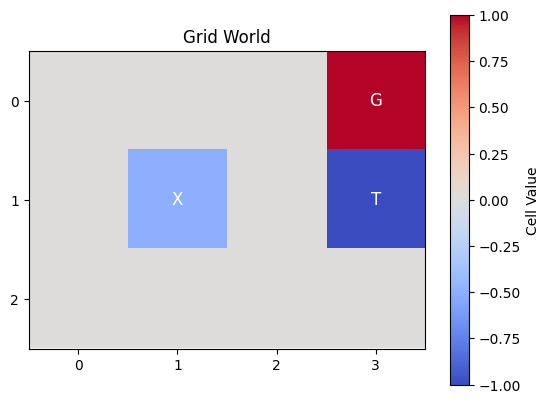

In [ ]:
visualize_grid()

In [ ]:
# Initialize Q-table
states = [(i, j) for i in range(grid_size[0]) for j in range(grid_size[1])]
actions = ['U', 'D', 'L', 'R']
q_table = {(i, j): {a: 0 for a in actions} for i, j in states}
# print(q_table)

In [ ]:
def visualize_grid_with_q_values(q_table):
    grid = np.zeros((grid_size[0], grid_size[1]))

    # Update for obstacles
    for obs in obstacle_states:
        grid[obs[0], obs[1]] = -0.5

    # Update for terminal states
    for goal in terminal_states['goal']:
        grid[goal[0], goal[1]] = 1

    for trap in terminal_states['trap']:
        grid[trap[0], trap[1]] = -1

    plt.imshow(grid, cmap='coolwarm', origin='upper')
    plt.colorbar(label='Cell Value')
    plt.title("Grid World with Q-values")
    plt.xticks(np.arange(0, grid_size[1], 1))
    plt.yticks(np.arange(0, grid_size[0], 1))

    for state, actions in q_table.items():
        i, j = state
        best_action = max(actions, key=actions.get)

        if best_action == 'U':
            plt.arrow(j, i, 0, -0.3, head_width=0.2, head_length=0.1, fc='k', ec='k')
        elif best_action == 'D':
            plt.arrow(j, i, 0, 0.3, head_width=0.2, head_length=0.1, fc='k', ec='k')
        elif best_action == 'L':
            plt.arrow(j, i, -0.3, 0, head_width=0.2, head_length=0.1, fc='k', ec='k')
        elif best_action == 'R':
            plt.arrow(j, i, 0.3, 0, head_width=0.2, head_length=0.1, fc='k', ec='k')

    for goal in terminal_states['goal']:
        plt.text(goal[1], goal[0], 'G', fontsize=12, ha='center', va='center', color='white')

    for trap in terminal_states['trap']:
        plt.text(trap[1], trap[0], 'T', fontsize=12, ha='center', va='center', color='white')

    for obs in obstacle_states:
        plt.text(obs[1], obs[0], 'X', fontsize=12, ha='center', va='center', color='white')

    plt.show()

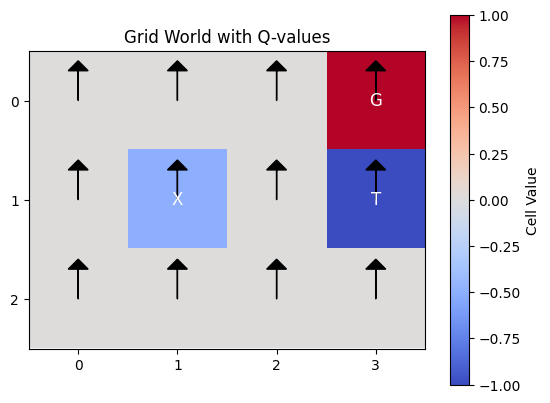

In [ ]:
visualize_grid_with_q_values(q_table)

In [ ]:
# Initialize parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

In [ ]:
# Function to choose an action based on epsilon-greedy policy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return max(q_table[state], key=q_table[state].get)


In [ ]:
# Initialize Q-table
states = [(i, j) for i in range(grid_size[0]) for j in range(grid_size[1])]
actions = ['U', 'D', 'L', 'R']
q_table = {(i, j): {a: 0 for a in actions} for i, j in states}
# print(q_table)

# Training loop
for episode in range(1, 501):
    state = (2, 0)
    total_reward = 0

    # Update the while loop condition to check for multiple terminal states
    while [state[0], state[1]] not in terminal_states['goal'] and [state[0], state[1]] not in terminal_states['trap']:
        action = choose_action(state)
        next_state = stochastic_move(state, action)
        row, col = next_state
        reward = rewards[row, col]
        total_reward += reward

        # Q-value update
        best_next_action = max(q_table[next_state], key=q_table[next_state].get)
        q_table[state][action] = (1 - alpha) * q_table[state][action] + \
                                 alpha * (reward + gamma * q_table[next_state][best_next_action])

        # Move to the next state
        state = next_state

    # Print updates every 10 episodes for demonstration
    # if episode % 10 == 0:
    #     print(f"Episode: {episode}, Total Reward: {total_reward}")

# Display the learned Q-values
print("\\nLearned Q-values:")
for state in states:
    print(f"State: {state} - {q_table[state]}")


\nLearned Q-values:
State: (0, 0) - {'U': -0.5431596554289255, 'D': -0.5708663485756237, 'L': -0.5007688945468124, 'R': -0.18447818636611552}
State: (0, 1) - {'U': -0.148505, 'D': -0.148505, 'L': -0.4145212316983202, 'R': 0.3932786430731371}
State: (0, 2) - {'U': 0.30941537504170047, 'D': -0.12440360285296027, 'L': -0.16012590908928045, 'R': 0.9999999999999994}
State: (0, 3) - {'U': 0, 'D': 0, 'L': 0, 'R': 0}
State: (1, 0) - {'U': -0.7244255685085832, 'D': -0.901390780642912, 'L': -0.8691568808220665, 'R': -0.9030395797710778}
State: (1, 1) - {'U': 0, 'D': 0, 'L': 0, 'R': 0}
State: (1, 2) - {'U': 0.39999999999999913, 'D': -0.5601946670219562, 'L': -0.14565897756556168, 'R': -0.7712320754503901}
State: (1, 3) - {'U': 0, 'D': 0, 'L': 0, 'R': 0}
State: (2, 0) - {'U': -1.1856032191748411, 'D': -1.3915443444234483, 'L': -1.355315448505164, 'R': -1.0634000000000028}
State: (2, 1) - {'U': -1.0074597021388447, 'D': -1.0372800160600313, 'L': -1.1893162222947227, 'R': -0.6260000000000017}
State:

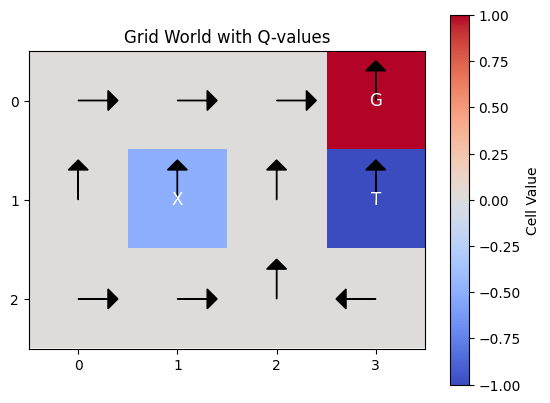

In [ ]:
visualize_grid_with_q_values(q_table)